[HuggingFace LLM Leader board](https://huggingface.co/spaces/HuggingFaceH4/open_llm_leaderboard)  
[Documentation Link](https://huggingface.co/tiiuae/falcon-40b)

Note: Use GPU in Runtime  

In [1]:
# Run this cell at the beginning of the session 

!pip install transformers
!pip install einops
!pip install accelerate
!pip install xformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 104.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 15.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 1.9 MB/s eta 0:00:00


In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import transformers
import torch

##Model:  "tiiuae/falcon-7b"

In [3]:
model = "tiiuae/falcon-7b"

tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
)

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b:
- configuration_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b:
- modelling_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The model 'RWForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PLBartForCausalLM', 'ProphetNetForCausalLM', 'QDQBertLMHeadModel', 'ReformerModelWithLMHead', 'RemBertForCausalLM', 'RobertaForCausalLM', 'RobertaPreLayerNormForC

In [4]:
sequences = pipeline(
   "Draft an apology email to a customer who experienced a delay in their order and provide reassurance that the issue has been resolved",
    max_length=200,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
)
for seq in sequences:
    print(f"Result: {seq['generated_text']}")

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1255: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Result: Draft an apology email to a customer who experienced a delay in their order and provide reassurance that the issue has been resolved.
Sample Apology for Order Delayed Email
[Sender.Name],
Thank you for contacting us with regard to the order you have just placed. Unfortunately, our warehouse has been hit by a severe storm and the warehouse is not able to process this order in a normal fashion and this may take some weeks and we regret for the inconvenience.
We apologize for the delay as our warehouse will resume normal operations shortly.
We assure you that this is only a temporary issue and you can expect that your order will be on its way shortly.
Thank you for your patience in waiting for this matter to be sorted out.
[Sender.Name]
[Senders.Title] - [Senders.Company]
Tips to improve this template:
- The subject line should be more appealing and relevant to the content of the email so that it is read


##Model : "tiiuae/falcon-7b-instruct"

In [3]:
model = "tiiuae/falcon-7b-instruct"

tokenizer = AutoTokenizer.from_pretrained(model)

pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
)


A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modelling_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The model 'RWForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PLBartForCausalLM', 'ProphetNetForCausalLM', 'QDQBertLMHeadModel', 'ReformerModelWithLMHead', 'RemBertForCausalLM', 'RobertaForCausalLM', 'RobertaPreLayerNormForC

In [4]:
sequences = pipeline(
   "Wirte a mail to HR team regarding for change in job profile from Data analyst to Machine learning engineer",
    max_length=200,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1255: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


In [5]:
print()

for seq in sequences:
    print(f"Result: {seq['generated_text']}")


Result: Wirte a mail to HR team regarding for change in job profile from Data analyst to Machine learning engineer
Subject: Request for Job Profile Change

Dear [HR Team],

I am writing to request a job profile change from Data Analyst to Machine Learning Engineer at [company name]. I have a strong interest in data analysis and machine learning and would like to contribute to both areas.

I have more than 3 years of experience in data analysis, developing predictive models, and working with machine learning libraries such as pandas, scikit-learn, and TensorFlow. I have experience in developing algorithms to tackle complex problems and working with databases such as Google BigQuery, Azure SQL, and MySQL.

I have attached my resume below for your consideration. I am confident that my skills and knowledge make me the ideal candidate for the Machine Learning Engineer role. Please let me know if you require any further information or have any questions that I can help answer.




Note: The model is taking minimum 3 minutes for fetching the results

Resource Utilization:  

Tried to use "tiiuae/falcon-40b", due to requirement of huge resource the colab got crashed.

Hence, it is better to try with bfloat8 models and resource utilization and results shall be evaluated

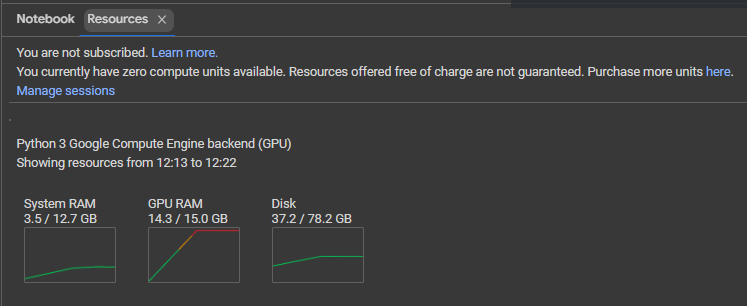